# Assessment Rule Derivation
This notebook presents the procedure of assessment rule derivation for the maximum deflection of carbon concrete elements consistent with EC2

Based on section 7.4.2 of the EC2 (Nachweis der Begrenzung der Verformungen ohne direkte Berechnung; Cases where calculations may be omitted)

##### eq (7.16.a): 

$$\dfrac{l}{d} = K.\left[11+1.5\sqrt{f_{ck}}\dfrac{\rho_0}{\rho} + 3.2\sqrt{f_{ck}}.\sqrt{\left(\dfrac{\rho_0}{\rho} - 1\right)^3}\right] \mathrm{if} \rho \leq \rho_0$$

$$ \dfrac{l}{d} = K.\left[11+1.5\sqrt{f_{ck}}\dfrac{\rho_0}{\rho- \rho^\prime} + \dfrac{1}{12}\sqrt[2]{f_{ck}}.\sqrt{(\dfrac{\rho^\prime}{\rho_0})}\right] \mathrm{if} \rho > \rho_0 $$

| Symbol | Unit | Description
| :-: | :-: | :- |
| $\dfrac{l}{d}$ | - | the limit value of the bending slenderness (ratio of span to effective height) |
| K | - | the coefficient for consideration of the different static systems according to Table 7.4N |
| $\rho_0$ | - | the reference reinforcement ratio, $\rho_0 = 10^{-3}.\sqrt{f_{ck}}$ |
| $\rho$ | - | the required ratio of tensile reinforcement in the center of the span to resist the design moment (at the restraint section for cantilever beams) |
| $\rho^\prime$ | - | the required ratio of compression reinforcement in the center of the span to resist the design moment (at the restraint section for cantilever beams) |
| $f_{ck}$ | Mpa | the Characteristic cylinder compressive strength of the concrete after 28 days |

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sympy import symbols
from sympy.plotting import plot
import sympy as sp
import numpy as np

In [19]:
K, rho_0, rho, rho_p, f_ck = symbols(r'K, \rho_0, \rho,\rho^\prime, f_{ck}', real=True, nonnegative=True)

In [20]:
ldr = sp.Piecewise(
     (K*(11 + 1.5*(f_ck)**0.5*(rho_0/rho) + 3.2*((f_ck)**0.5)*((rho_0/rho - 1)**(3/2))) , rho <= rho_0 ),
     ((K*(11 + 1.5*(f_ck)**0.5*(rho_0/(rho - rho_p)) +  round(1/12)*((f_ck)**0.5)*((rho_p/rho_0)**0.5))) , rho > rho_0) 
)

ldr

Piecewise((K*(3.2*f_{ck}**0.5*(-1 + \rho_0/\rho)**1.5 + 11 + 1.5*\rho_0*f_{ck}**0.5/\rho), \rho <= \rho_0), (K*(1.5*\rho_0*f_{ck}**0.5/(\rho - \rho^\prime) + 11), True))

In [21]:
# f_ck = np.array([20, 30, 35, 40, 50, 70])
# rho_0 = np.sqrt(f_ck) * 0.001
# # K = np.ones(len(f_ck))
# # rho_p = np.zeros(len(f_ck))
# rho_0

In [22]:
model_data = {
f_ck : 50,
K : 1,
rho_0 : 0.007,
rho_p : 0,
}

In [23]:
get_slenderness = sp.lambdify(
    (rho), ldr.subs(model_data), 'numpy'
)

In [25]:
import matplotlib.pyplot as plt
%matplotlib widget

rho = np.arange(0.005, 0.025, 0.001)
slenderness = get_slenderness(rho)
slenderness

plt.plot(rho*100, slenderness)
plt.ylabel('l/d'); plt.xlabel(r'$\rho$ %'); plt.title('7.16a & 7.16b curve')
plt.show()

<string>:2: RuntimeWarning: invalid value encountered in power


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

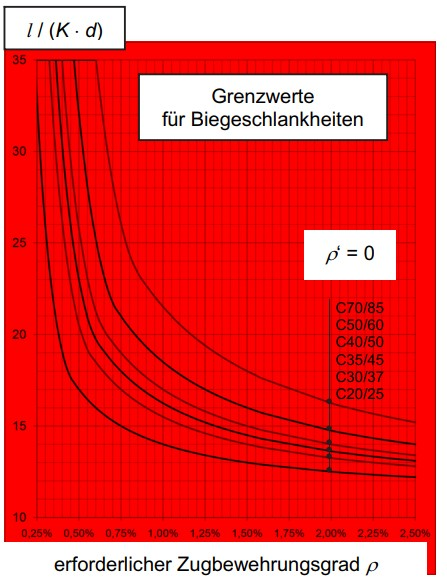

In [8]:
# Import pandas library 
import pandas as pd 
n = 5
data = {
        'L' : (1260,1260),
        'B' : (150,150),
        'H': (25,35),
        'E_ct': (70000,70000),
        'E_cc': (40000,40000),
        'eps_cr': (0.00013,0.00013),
        'eps_cy': (-0.003,-0.003),
        'eps_cu': (0.01,0.01),
        'eps_tu': (0.1, 0.1),
        'mu': (0, 0),
        'z_j': ((8, 22),(8, 22)),
        'A_j': ((3.62,3.62),(3.62,3.62)),
        'E_j': ((240000,240000),(240000,240000)),
        'eps_sy_j' : ((0.0113,0.0113), (0.0113,0.0113)),
    }

# Create the pandas DataFrame 
df = pd.DataFrame.from_dict(data) 
  
# print dataframe. 
df

,L,B,H,E_ct,E_cc,eps_cr,eps_cy,eps_cu,eps_tu,mu,z_j,A_j,E_j,eps_sy_j
0,1260,150,25,70000,40000,0.00013,-0.003,0.01,0.1,0,"(8, 22)","(3.62, 3.62)","(240000, 240000)","(0.0113, 0.0113)"
1,1260,150,35,70000,40000,0.00013,-0.003,0.01,0.1,0,"(8, 22)","(3.62, 3.62)","(240000, 240000)","(0.0113, 0.0113)"


### Concrete parameters range

In [9]:
{
'E_ct': (10000,70000,n),
'E_cc': (30000,40000,n),
'eps_cr': (0.00013,0.0002,n),
'eps_cy': (-0.003,-0.004,n),
'eps_cu': (0.001,0.01,n),
'eps_tu': (0.003,0.03,n),
'mu': (0,0.2,n),
}

{'E_ct': (10000, 70000, 5),
 'E_cc': (30000, 40000, 5),
 'eps_cr': (0.00013, 0.0002, 5),
 'eps_cy': (-0.003, -0.004, 5),
 'eps_cu': (0.001, 0.01, 5),
 'eps_tu': (0.003, 0.03, 5),
 'mu': (0, 0.2, 5)}

### Reinforcement parameters range

In [10]:
{
'E_j': ((240000,240000),(280000,280000), n),
'eps_sy_j' : ((0.0113,0.0113), (0.009,0.009), n),
'n_m' : (2, 1000, 10)
}

{'E_j': ((240000, 240000), (280000, 280000), 5),
 'eps_sy_j': ((0.0113, 0.0113), (0.009, 0.009), 5),
 'n_m': (2, 1000, 10)}

### Cross-section parameters range

In [11]:
{
'L' : (660,1260,n),
'B' : (150,15,n),
'H': (25,35,n),
'z_j': ((0, 30),(15, 15),n),
'A_j': ((2.62,2.62),(4.2,4.2),n),
}

{'L': (660, 1260, 5),
 'B': (150, 15, 5),
 'H': (25, 35, 5),
 'z_j': ((0, 30), (15, 15), 5),
 'A_j': ((2.62, 2.62), (4.2, 4.2), 5)}

In [12]:
%matplotlib inline

In [13]:
from os.path import join
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
import bmcs_utils.api as bu

In [14]:
import rpy2.robjects as robjects

In [15]:
r_lm = robjects.r["lm"]
r_predict = robjects.r["predict"]

In [16]:
import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

In [17]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

C:\Users\srate\miniconda3\envs\py37\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


Initial Objective: 153.0
Final Objective: 0.07875701862695708
Solution
A = 1.044240543983939
B = 0.9769542288806379
C = 0.02359961940577901
D = 0.022507757291054843
R^2 correlation = 0.9964346365063944


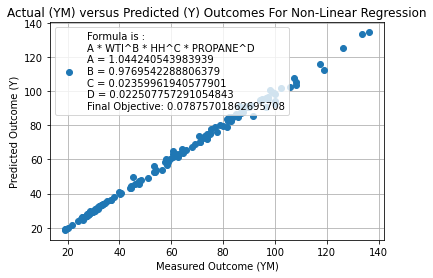

In [18]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data file from URL address
data = 'https://apmonitor.com/me575/uploads/Main/oil_data.txt'
df = pd.read_csv(data)

xm1 = np.array(df["WTI_PRICE"])  # WTI Oil Price
xm2 = np.array(df["HH_PRICE"])   # Henry Hub Gas Price
xm3 = np.array(df["NGL_PRICE"])  # MB Propane Spot Price
ym = np.array(df["BEST_PRICE"])  # oil sales price received (outcome)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    #y = a * xm1 + b  # linear regression
    y = a * ( xm1 ** b ) * ( xm2 ** c ) * ( xm3 ** d )
    return y

# define objective
def objective(x):
    # calculate y
    y = calc_y(x)
    # calculate objective
    obj = 0.0
    for i in range(len(ym)):
        obj = obj + ((y[i]-ym[i])/ym[i])**2    
    # return result
    return obj

# initial guesses
x0 = np.zeros(4)
x0[0] = 0.0 # a
x0[1] = 0.0 # b
x0[2] = 0.0 # c
x0[3] = 0.0 # d

# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# optimize
# bounds on variables
my_bnds = (-100.0, 100.0)
bnds = (my_bnds, my_bnds, my_bnds, my_bnds)
solution = minimize(objective, x0, method='SLSQP', bounds=bnds)
x = solution.x
y = calc_y(x)

# show final objective
cObjective = 'Final Objective: ' + str(objective(x))
print(cObjective)

# print solution
print('Solution')

cA = 'A = ' + str(x[0])
print(cA)
cB = 'B = ' + str(x[1])
print(cB)
cC = 'C = ' + str(x[2])
print(cC)
cD = 'D = ' + str(x[3])
print(cD)

cFormula = "Formula is : " + "\n" \
           + "A * WTI^B * HH^C * PROPANE^D"
cLegend = cFormula + "\n" + cA + "\n" + cB + "\n" \
           + cC + "\n" + cD + "\n" + cObjective

#ym measured outcome
#y  predicted outcome

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(ym,y)
r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

# plot solution
plt.figure(1)
plt.title('Actual (YM) versus Predicted (Y) Outcomes For Non-Linear Regression')
plt.plot(ym,y,'o')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend([cLegend])
plt.grid(True)
plt.show()